# 2.1.1. Moto di un proiettile

Un oggetto viene lanciato con velocità iniziale $v_0$ = 6 m/s. L'angolo che il vettore $\vec{v}_0$ forma con la direzione orizzontale è $\theta_0$ = $\pi$/6.

Calcolare la gittata, il tempo di volo e la massima quota raggiunta.

![](img/ProjectileStrobo.png)


## Discussione del problema

Trascurando la resistenza dell'aria e considerando che il moto avviene con accelerazione costante pari all'accelerazione di gravità $\vec{g}$, si ottengono le equazioni che descrivono la posizione dell'oggetto, considerato come un **punto materiale**, in funzione del tempo. 
Da tali equazioni si possono ricavare le equazioni per:
* la **gittata**

$$ R = \dfrac{v_0^2}{g}\sin 2\theta_0 $$

* il **tempo di volo**

$$ t_{volo} = \dfrac{2 v_0\sin\theta_0}{g} $$

* la **quota massima**

$$ h = \dfrac{(v_0\sin\theta_0)^2}{g} $$



## Svolgimento dei calcoli con Python

Per eseguire i calcoli utilizziamo il modulo **numpy** e utilizziamo anche il modulo **matplotlib** per rappresentare graficamente le grandezze che caratterizzano il moto in questo esempio.

In [100]:
import numpy as np
import matplotlib.pyplot as plt

v0 =  6             # velocità iniziale (m/s)
theta0 = np.pi/4    # angolo fra il vettore veloocità iniziale e la direzione orizzontale  (radianti)
g = 9.8             # accelerazione di gravità (m/s^2)

R = (v0**2) * np.sin(2*theta0) / g   #   gittata

tB = 2 * v0 * np.sin(theta0) / g     #   tempo di volo

h = ((v0*np.sin(theta0))**2)/g       #   quota massima


print('\nGittata = {0:0.3f} (m)\n'.format(R))
print('Tempo di volo = {0:0.3f} (s)\n'.format(tB))
print('Quota massima = {0:0.3f} (m)\n'.format(h))



Gittata = 3.673 (m)

Tempo di volo = 0.866 (s)

Quota massima = 1.837 (m)



## Studio del moto: equazioni orarie e traiettoria

Le equazioni orarie forniscono il valore di ciascuna delle coordinate del punto materiale in funzione del tempo. In questo caso:

$$ x(t) = v_{0x} t $$

$$ y(t) = v_{0y} t - \dfrac{1}{2}gt^2 $$

dove $v_{0x}$ e $v_{0y}$ sono le componenti del vettore velocità iniziale $\vec{v}_0$ rispetto agli assi cartesiani $x$ e $y$.

$$ v_{0x} = v_0 \cos\theta_0 $$

$$ v_{0y} = v_0 \sin\theta_0 $$

* Possiamo utilizzare le equazioni $x(t)$ e $y(t)$ come equazioni parametriche per la **traiettoria**.
* Infatti possiamo considerare un **array** di valori di $t$ compresi fra l'istante iniziale $t=0$ e un istante finale che per comodità scegliamo coincidente con $t_B$, il *tempo di volo*.
    * Per generare l'array di valori distribuiti in modo lineare fra $0$ e $t_B$ utilizziamo la funzione **linspace()** del modulo **numpy**.
* Calcoliamo le coordinate $x$ e $y$ in corrispondenza a ciascuno dei valori di $t$ compresi nell'array.
* Riportiamo in grafico i punti corripondenti alle coppie di coordinate $x, y$ per ciascun valore di $t$ per ottenere così il grafico della traiettoria.
     * E' importante che l'asse $x$ e l'asse $y$ abbiamo la stessa unità di misura e la stessa scala

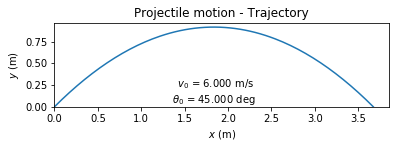

In [101]:
t = np.linspace(0, tB, 128)     
x = v0 * np.cos(theta0)*t
y = v0 * np.sin(theta0)*t - 0.5 * g * t**2

print()
plt.figure(2)
plt.plot(x,y)
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.xlim(left=0)
plt.ylim(bottom = 0)

plt.gca().set_aspect('equal', adjustable = 'box')    # this is important

string =r" $v_0$ = {0:0.3f} m/s".format(v0)+ '\n' + r"$\theta_0$ = {0:0.3f} deg".format(theta0*180/np.pi)
plt.text(R/2,0,string, horizontalalignment='center', verticalalignment='bottom')
plt.title('Projectile motion - Trajectory')
plt.show()
print()

## Dipendenza dall'angolo di lancio $\theta_0$

Consideriamo la traiettoria che si ottiene in corrispondenza a valori diversi dell'angolo di lancio $\theta_0$, mantenendo costante il modulo della velocità iniziale $v_0$.

* Produciamo un array di valori di $\theta_0$ utilizzando la funzione **arange()** del modulo **numpy** 
* Riportiamo in grafico le traiettorie corrispondenti a tutti i valori di $\theta_0$

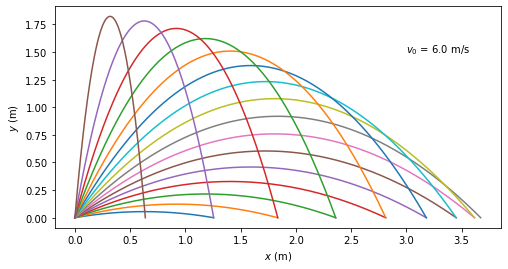

In [97]:
theta0deg = np.arange(10, 90, 5)
theta0=theta0deg*np.pi/180

fig = plt.figure(3,(8,6))

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.text(3.0, 1.50, r'$v_0$ = {0:0.1f} m/s'.format(v0))

for angle in theta0:
    tB = 2 * v0 * np.sin(angle)/ g
    t = np.linspace(0, tB, 128)
    x = v0 * np.cos(angle)*t
    y = v0 * np.sin(angle)*t - 0.5 * g * t**2
    plt.plot(x,y)
    plt.draw()

plt.gca().set_aspect('equal', adjustable = 'box')
#plt.savefig('AllTrajectories.pdf')
plt.show()

### Get a feeling

Cosa cambia al variare dell'angolo di lancio $\theta_0$ ?
* Tempo di volo
* Gittata
* Quota massima

> Angoli complementari (per esempio 30° e 60°) danno la stessa gittata 
>> ma il tempo di volo e la quota massima sono diversi.


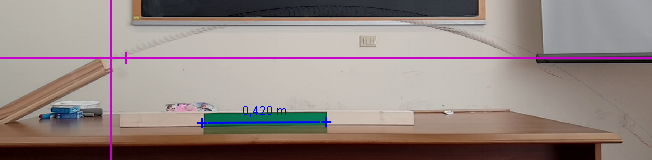

In [105]:
from IPython.display import Image
Image('./img/ProjectileStrobo.png')

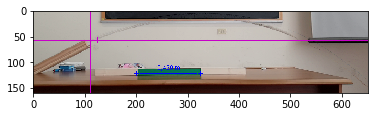

In [113]:
img = plt.imread("./img/ProjectileStrobo.png")
implot = plt.imshow(img)

### Simulazione e previsione

Scegliendo di far variare l'angolo $\theta_0$ a passi di $1$ grado si delinea una *curva inviluppo* che delimita la regione i cui punti
<span style="color:red">non sono raggiunti da nessuna traiettoria</span>, qualunque sia l'angolo di lancio $\theta_0$, per una data velocità iniziale $v_0$.

Questa curva prende il nome di **parabola di sicurezza**, descritta dall'equazione

$$ y = \dfrac{v_0^2}{2g} - \dfrac{1}{2}\dfrac{g}{v_0^2}x^2 $$

Nello script seguente produciamo un grafico contenente:
* le varie traiettorie corrispondenti a valori di $\theta_0$ incrementati a passi di $1$ grado
* la parabola di sicurezza


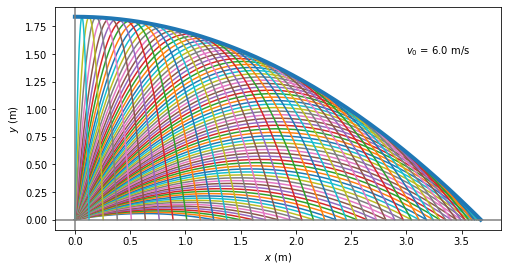

In [96]:
theta0deg = np.arange(10, 90, 1)
theta0=theta0deg*np.pi/180

fig = plt.figure(4,(8,6))

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.text(3.0, 1.50, r'$v_0$ = {0:0.1f} m/s'.format(v0))

for angle in theta0:
    tB = 2 * v0 * np.sin(angle)/ g
    t = np.linspace(0, tB, 128)
    x = v0 * np.cos(angle)*t
    y = v0 * np.sin(angle)*t - 0.5 * g * t**2
    plt.plot(x,y)
    plt.draw()

plt.gca().set_aspect('equal', adjustable = 'box')
#plt.savefig('AllTrajectories.pdf')

Rmax = R = (v0**2) / g   #   gittata massima
xx = np.linspace(0, Rmax, 180) 
yy = v0*v0/(2*g)- 0.5*g*xx*xx/(v0*v0)
plt.plot(xx,yy, linewidth = 4)
plt.axhline(color='gray')
plt.axvline(color='gray')

plt.show()

## What we have learned

## References and notes

#### Images
1. Figura 1. Immagine del volo di una pallina da ping pong ottenuta da un video registrato con smartphone Samsung 9 in modalità rallentatore ed analizzato con il software [**Tracker**](https://physlets.org/tracker).